# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf 
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_set = train_datagen.flow_from_directory('Training',target_size=(64, 64),batch_size=32,class_mode='binary')
test_set = test_datagen.flow_from_directory('Validation',target_size=(64, 64),batch_size=32,class_mode='binary')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


# Define the CNN model

In [11]:
model = Sequential()

model.add(Input(shape=(64, 64, 3)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

# Compile the model

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# Display model summary

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 128)        

# Train the model

In [14]:
history = model.fit(train_set, epochs=25, validation_data = test_set)

Epoch 1/25
1470/1470 [==============================] - 190s 128ms/step - loss: 0.5233 - accuracy: 0.7337 - val_loss: 0.2765 - val_accuracy: 0.8996
Epoch 2/25
1470/1470 [==============================] - 187s 127ms/step - loss: 0.2934 - accuracy: 0.8799 - val_loss: 0.1916 - val_accuracy: 0.9247
Epoch 3/25
1470/1470 [==============================] - 188s 128ms/step - loss: 0.2322 - accuracy: 0.9080 - val_loss: 0.1613 - val_accuracy: 0.9393
Epoch 4/25
1470/1470 [==============================] - 190s 129ms/step - loss: 0.2076 - accuracy: 0.9201 - val_loss: 0.1564 - val_accuracy: 0.9415
Epoch 5/25
1470/1470 [==============================] - 188s 128ms/step - loss: 0.1961 - accuracy: 0.9261 - val_loss: 0.1564 - val_accuracy: 0.9448
Epoch 6/25
1470/1470 [==============================] - 188s 128ms/step - loss: 0.1874 - accuracy: 0.9287 - val_loss: 0.1268 - val_accuracy: 0.9560
Epoch 7/25
1470/1470 [==============================] - 188s 128ms/step - loss: 0.1818 - accuracy: 0.9303 - val_

# Extract loss and accuracy values from the history object

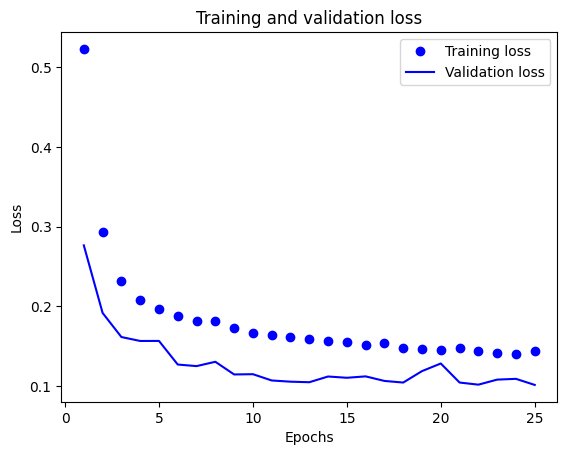

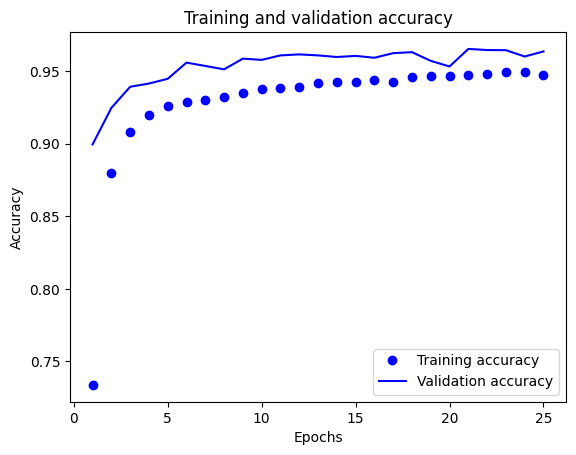

In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

# Plot accuracy
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
model.save('gender_classification.keras') 
model.save('gender_classification.h5') 

In [2]:
loaded_model = tf.keras.models.load_model('gender_classification.keras')

# Load and preprocess the test image

1/1 [==============================] - 0s 433ms/step
[[0.]]


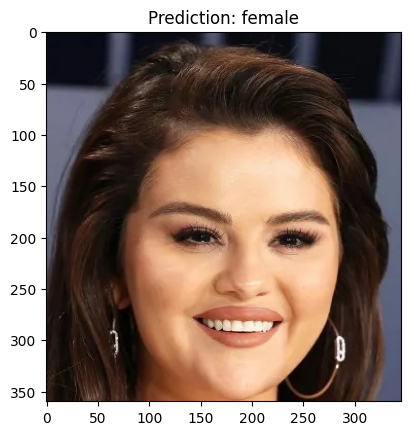

In [3]:
test_image = image.load_img('girl.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
# Make a prediction
result = loaded_model.predict(test_image)
print(result)

if result[0][0] <= 0.8:
     prediction = 'female'
else:
     prediction = 'male'
 # Display the image
plt.imshow(image.load_img('girl.jpg'))
plt.title(f'Prediction: {prediction}')
plt.show()